<a href="https://colab.research.google.com/github/Turakulov/Python/blob/master/project_house_sale_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [35]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Удалим столбец `Id` так как он бесполезен

In [0]:
df.drop(columns = ['Id'], axis = 1, inplace=True)

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


Смещенность говорит о симметрии в распределении. Давайте выведем смещенность датасета.

In [38]:
df.skew()

MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
d

Если смещенность равна нулю, то выборка распределена симметрично. 
Если меньше нуля или больше нуля, то выборку  распределена несимметрично.
Если смещенность меньше нуля , то выбрка смещена влево, а если наоборот , то вправо.
В нашем датасете такие признаки как `LotArea`, `LowQualFinSF`, `SsnPorchPoolArea` и `MiscVal` сильно смещены вправо.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Некоторые признаки неправильно сконвертировались в количественные, это нужно исправить сделав их категориальными

In [0]:
сats = ['MSSubClass', 'OverallQual', 'OverallCond', 'GarageCars']

for feature in сats:
    df[feature] = df[feature].astype(object)

Проверим выборку на наличие пропусков

In [41]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Пропуски', 1 : '% от всех данных'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% от всех данных', ascending=False).round(1)
        print ("Датафрейм содержит " + str(df.shape[1]) + " столбцов.\n"      
            "Всего " + str(mis_val_table_ren_columns.shape[0]) +
              " столбцов, имеющих пропуски.")
        return mis_val_table_ren_columns
missing_values_table(df).style.background_gradient(cmap='Reds')

Датафрейм содержит 80 столбцов.
Всего 19 столбцов, имеющих пропуски.


,Пропуски,% от всех данных
PoolQC,1453,99.500000
MiscFeature,1406,96.300000
Alley,1369,93.800000
Fence,1179,80.800000
FireplaceQu,690,47.300000
LotFrontage,259,17.700000
GarageType,81,5.500000
GarageYrBlt,81,5.500000
GarageFinish,81,5.500000
GarageQual,81,5.500000


Удалим из выборки те столбцы, которые имеют более 46% пропусков

In [42]:
missing_df = missing_values_table(df)
missing_columns = list(missing_df[missing_df['% от всех данных'] > 46].index)
print('Мы удалим %d столбцов.' % len(missing_columns))
df = df.drop(columns = list(missing_columns))

print('Размерность тренировочной выборки:', df.shape)

Датафрейм содержит 80 столбцов.
Всего 19 столбцов, имеющих пропуски.
Мы удалим 5 столбцов.
Размерность тренировочной выборки: (1460, 75)


Заполним количественные признаки медианным значением

In [0]:
features_to_examine = ['LotFrontage','MasVnrArea','GarageYrBlt']
for col in features_to_examine:
    df[col].fillna(df[col].median(),inplace=True)

Заполним категориальные переменные 

In [0]:
features_to_examine = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
 'BsmtFinType2','Electrical','GarageType','GarageFinish',
 'GarageQual','GarageCond']

df['MasVnrType'].fillna('None', inplace=True)
fill_with_No_Bsmt = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
fill_with_No_Grg = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

for col in fill_with_No_Bsmt:
    df[col].fillna('No_Bsmt', inplace=True)
    
for col in fill_with_No_Grg:
    df[col].fillna('No_Grg', inplace=True)
    
df['Electrical'].fillna('SBrkr', inplace=True)

In [45]:
missing_values_table(df).style.background_gradient(cmap = 'Reds')

Датафрейм содержит 75 столбцов.
Всего 0 столбцов, имеющих пропуски.


,Пропуски,% от всех данных


Давайте теперь разберемся с нашим таргетом (переменная, которую мы хотим предсказать)

In [46]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

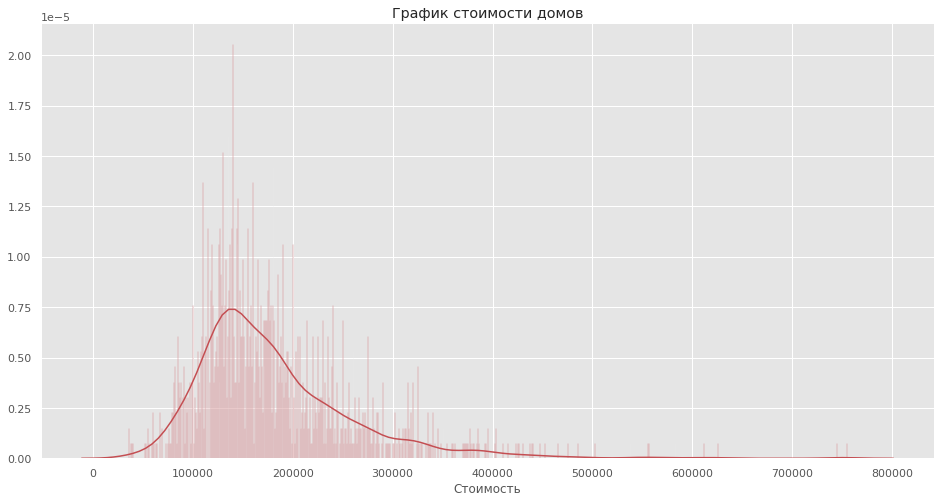

In [47]:
plt.subplots(figsize=(16, 8))
sns.distplot(df['SalePrice'], bins = 800, color = 'r')  
plt.title('График стоимости домов')
plt.xlabel('Стоимость')
plt.show()

In [48]:
grs = df.groupby(["MSZoning"])[["SalePrice"]].mean().reset_index()
fig = px.bar(grs[['MSZoning', 'SalePrice']].sort_values('SalePrice', ascending=False), 
             y="SalePrice", x="MSZoning", color='MSZoning', title = 'График зависимости цены дома от типа',
             labels = {'MSZoning': 'Тип здания', 'SalePrice': 'Стоимость'})
fig.show()

* FV - Загородный дом, 
* RL - Жилой негустонаселенный дом, 
* RH - Жилой густонаселенный дом, 
* RM - Жилой средненаселенный дом,
* C - Коммерческое здание

Визуализируем боксплоты стоимости в зависимости от покрытия крыши

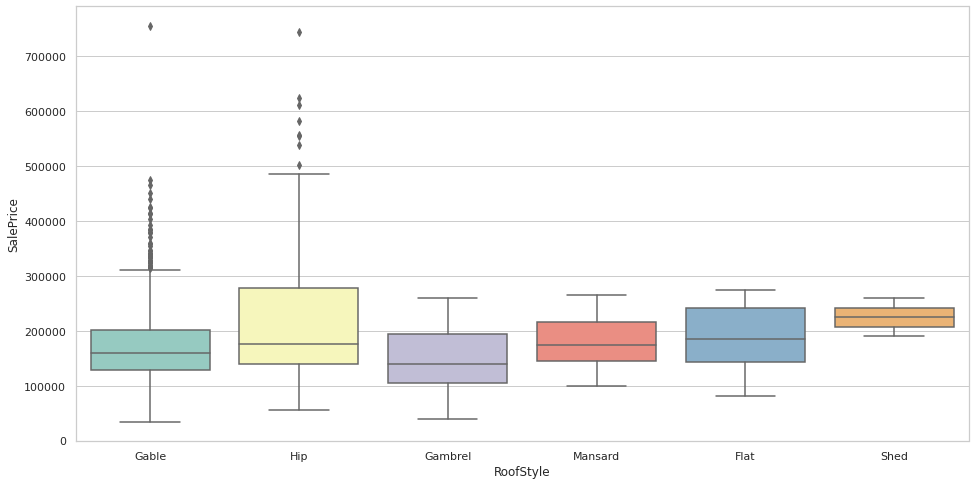

In [49]:
sns.set(style="whitegrid")
plt.subplots(figsize=(16, 8))
ax = sns.boxplot(x = df["RoofStyle"], y = df["SalePrice"], palette = "Set3")

Построим график стоимости в зависимости от типа этажности дома и общей оценки

OverallCond: Оценка общего состояния дома

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

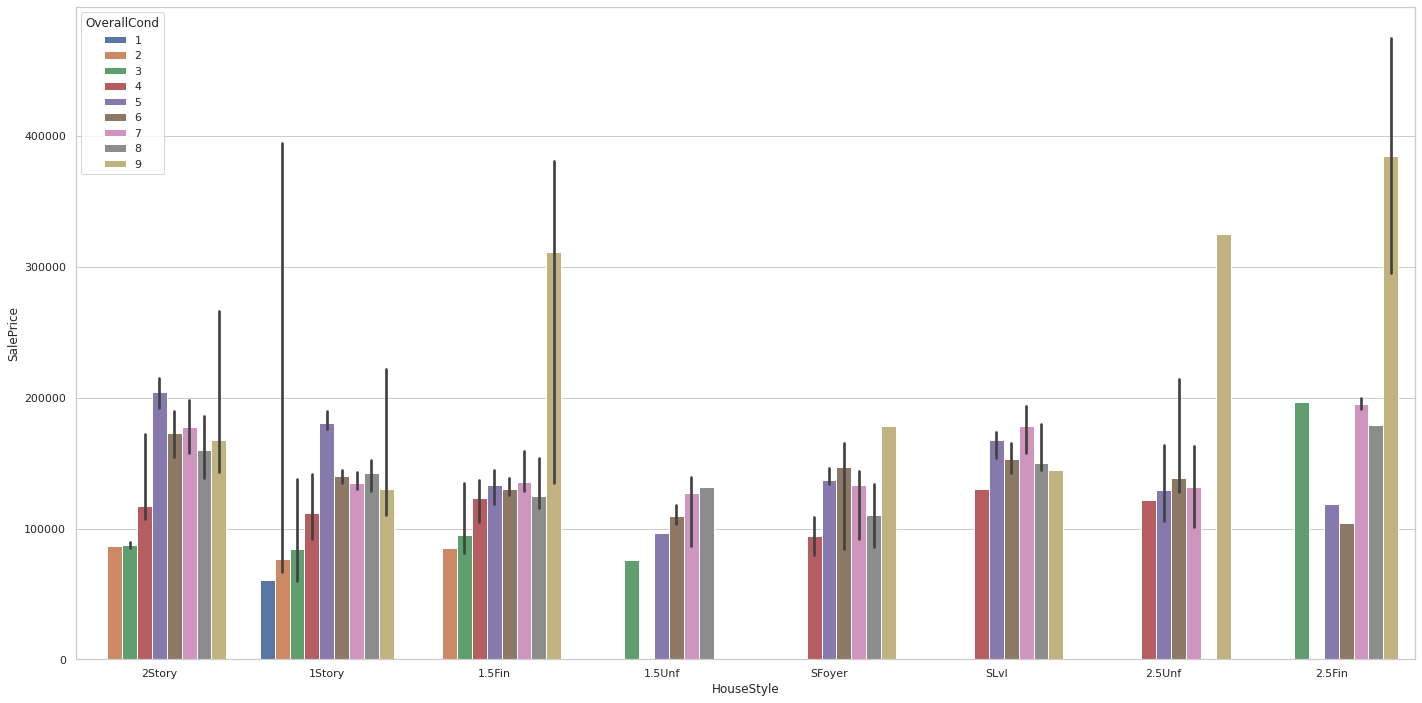

In [50]:
plt.subplots(figsize=(24, 12))
ax = sns.barplot(x='HouseStyle', y='SalePrice', hue = 'OverallCond', data=df, estimator = np.median)

* 1Story	- Одноэтажный дом
* 1.5Fin	- Полтораэтажный (второй этаж не достроен)
* 1.5Unf	- Полтораэтажный (второй этаж достроен)
* 2Story	- Двухэтажный
* 2.5Fin	- 2.5 этажный (третий этаж достроен)
* 2.5Unf	- 2.5 этажный (третий этаж не достроен)
* SFoyer	- Совместное фойе
* SLvl	    - Совместный этаж

In [51]:
fig = px.scatter(df, x="LotArea", y="SalePrice", trendline="ols",
                 title = 'График зависимости цены дома от площади здания',
                 labels = {'LotArea': 'Площадь здания', 'SalePrice': 'Стоимость'})
fig.show()

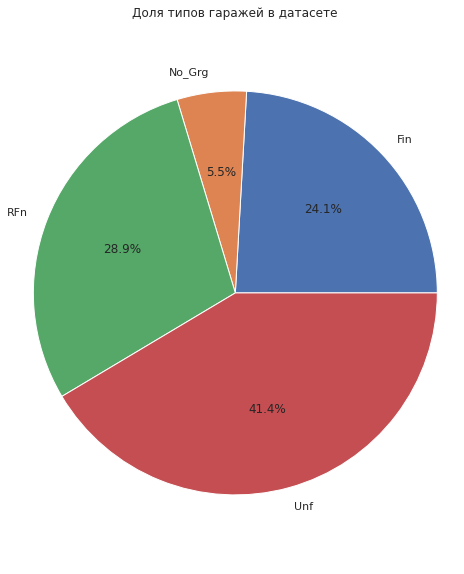

In [52]:
df2 = df
df2 = df2.groupby('GarageFinish').count()
fig1, ax = plt.subplots(figsize=(8, 10))
ax.pie(df2['SalePrice'], labels = df2.index, autopct='%1.1f%%')
ax.axis('equal')
plt.title("Доля типов гаражей в датасете")
plt.show()

Интерьер гаража

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	 No Garage

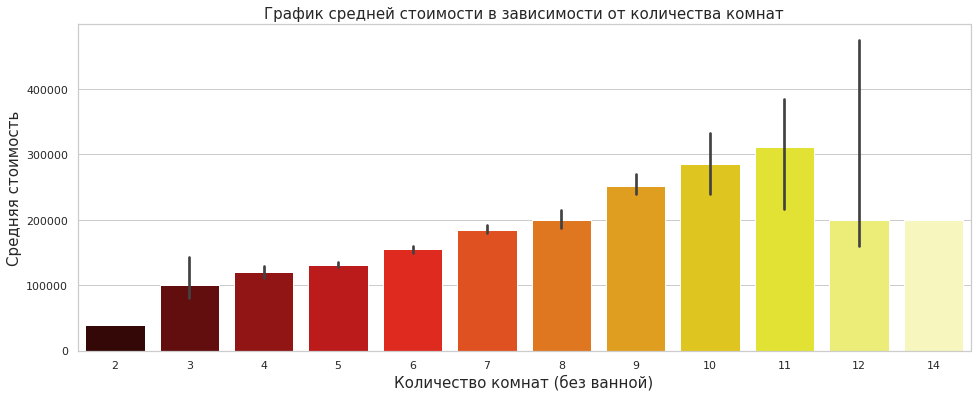

In [53]:
plt.subplots(figsize=(16, 6))
ax = sns.barplot(data = df, x = "TotRmsAbvGrd", y="SalePrice", estimator = np.median, palette = 'hot')
plt.title('График средней стоимости в зависимости от количества комнат', fontsize=15)
plt.xlabel("Количество комнат (без ванной)", fontsize=15)
plt.ylabel("Средняя стоимость", fontsize=15)
plt.show()

Построим корреляционную матрицу

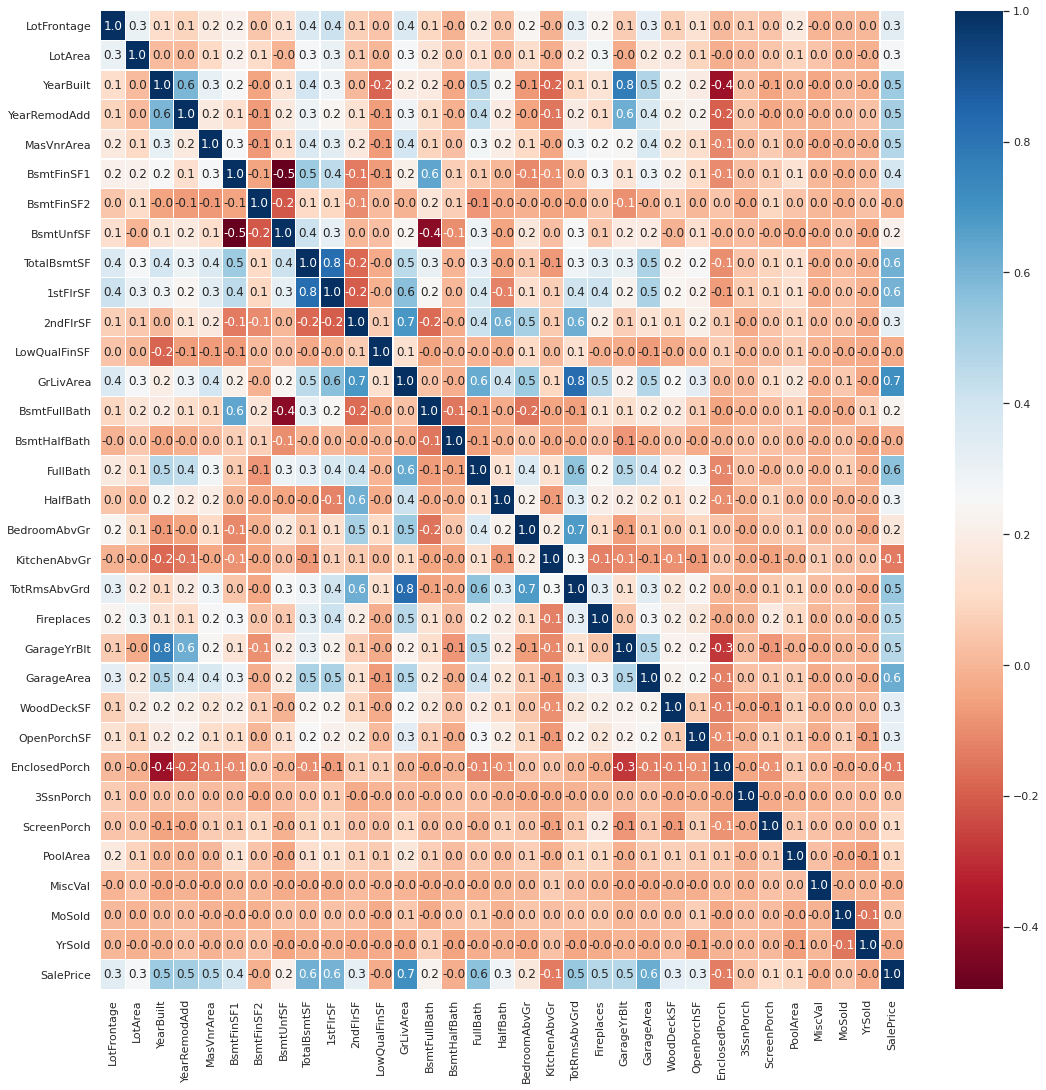

In [54]:
sns.set(font_scale=1)
plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, fmt=".1f", linewidths=0.2, cmap="RdBu");

Очень сильных корреляций не обнаружено. Есть незначительные корреляции, но мы не будем что-то с ними делать

Категориальные переменные переведем в количественные

In [0]:
from sklearn.preprocessing import LabelEncoder
categorical = []

for col in df.columns:
    if df[col].dtype == 'O':
        categorical.append(col)

le = LabelEncoder()

label_encoders = {}
for column in categorical:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [56]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,6,4,2003,2003,1,1,12,13,1,196.0,2,4,2,2,4,3,2,706,6,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,0,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,5,7,1976,1976,1,1,8,8,2,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,1,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,5,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,6,4,2001,2002,1,1,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,1,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,6,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,6,4,1915,1970,1,1,13,15,2,0.0,3,4,0,4,1,3,0,216,6,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,5,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,5,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,7,4,2000,2000,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,1,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,0,12,2008,8,4,250000


Отскалируем переменные. Зачем это надо? К примеру, некоторые переменные измеряются в сантиметрах, некоторые в граммах, а некоторые вообще в попугаях или гиппопотамах. То есть у них разная шкала и их нужно отскалировать (отмасштабировать). 

In [0]:
y = df['SalePrice']
X = df.drop(columns = ['SalePrice'], axis = 1)

columns_x = X.columns
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X = pd.DataFrame(X, columns = [columns_x])

In [58]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.357143,0.75,0.150685,0.033420,1.0,1.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.949275,0.883333,0.2,0.142857,0.857143,0.866667,0.333333,0.12250,0.666667,1.0,0.4,0.5,1.00,0.75,0.333333,0.125089,1.0,0.0,0.064212,0.140098,0.2,0.0,1.0,1.0,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.166667,0.936364,0.666667,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,1.0,0.8
1,0.000000,0.75,0.202055,0.038795,1.0,1.0,1.0,0.0,0.5,0.0,1.000000,0.125,0.285714,0.0,0.285714,0.555556,0.875,0.753623,0.433333,0.2,0.142857,0.571429,0.533333,0.666667,0.00000,1.000000,1.0,0.2,0.5,1.00,0.25,0.000000,0.173281,1.0,0.0,0.121575,0.206547,0.2,0.0,1.0,1.0,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,0.166667,0.690909,0.666667,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,1.0,0.8
2,0.357143,0.75,0.160959,0.046507,1.0,0.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.934783,0.866667,0.2,0.142857,0.857143,0.866667,0.333333,0.10125,0.666667,1.0,0.4,0.5,1.00,0.50,0.333333,0.086109,1.0,0.0,0.185788,0.150573,0.2,0.0,1.0,1.0,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.166667,0.918182,0.666667,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,1.0,0.8
3,0.428571,0.75,0.133562,0.038561,1.0,0.0,1.0,0.0,0.0,0.0,0.250000,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.311594,0.333333,0.2,0.142857,0.928571,1.000000,0.666667,0.00000,1.000000,1.0,0.0,1.0,0.25,0.75,0.000000,0.038271,1.0,0.0,0.231164,0.123732,0.2,0.5,1.0,1.0,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.833333,0.890909,1.000000,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,1.0,0.0
4,0.357143,0.75,0.215753,0.060576,1.0,0.0,1.0,0.0,0.5,0.0,0.625000,0.250,0.285714,0.0,0.714286,0.777778,0.500,0.927536,0.833333,0.2,0.142857,0.857143,0.866667,0.333333,0.21875,0.666667,1.0,0.4,0.5,1.00,0.00,0.333333,0.116052,1.0,0.0,0.209760,0.187398,0.2,0.0,1.0,1.0,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.166667,0.909091,0.666667,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,1.0,0.8


Разделим выборку на тренировочную и тестовую. На тренировочных данных модель будет обучаться, а на тестовых данных мы будем определять качество модели. Мы обучаем модель только на тренировочных данных и проверяем на тестовых для того чтобы проверить какие результаты покажет модель на данных, которые она видит впервые. Если бы мы не делили данные, то модель выдавала бы некорректные результаты, потому что проверяла бы те же самые данные на которых обучилась. 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [60]:
LR = LinearRegression()

LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
y_train_pred = LR.predict(X_train) 

print('Ошибка MAE на обучении:', metrics.mean_absolute_error(y_train, y_train_pred))
print('Ошибка MSE на обучении:', metrics.mean_squared_error(y_train, y_train_pred))
print('Ошибка RMSE на обучении:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('-------------------------------------------------------')

print('Ошибка MAE на валидации:', metrics.mean_absolute_error(y_test, y_pred))
print('Ошибка MSE на валидации:', metrics.mean_squared_error(y_test, y_pred))
print('Ошибка RMSE на валидации:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(f"\nAccuracy : {LR.score(X_test,y_test)}")

Ошибка MAE на обучении: 24214.178701331864
Ошибка MSE на обучении: 1239018937.6696687
Ошибка RMSE на обучении: 35199.70081789998
-------------------------------------------------------
Ошибка MAE на валидации: 27962.91495444754
Ошибка MSE на валидации: 1675533469.5458982
Ошибка RMSE на валидации: 40933.28070831726

Accuracy : 0.7598866500010515


Напишем функцию для визуализации обучения и валидации

In [0]:
def plot_yreal_ypred(y_test, y_train, X_test, X_train, model, margin=0.3):
    """
        Рисует картинку для прогнозов
        model - модель 
        y_train, X_train - обучающая выборка
        y_test, X_test - тестовая выборка
        margin - граница рисунка 
    """
    
    plt.figure(figsize=(16,7))
    plt.subplot(121)
    plt.scatter(y_train, model.predict(X_train), color="red", alpha=1)
    plt.xlim(min(y_train) - margin, max(y_train) + margin)
    plt.ylim(min(y_train) - margin, max(y_train) + margin)
    plt.title('Train set', fontsize=20)
    plt.xlabel('y', fontsize=14)
    plt.ylabel('Estimated y', fontsize=14)

    plt.subplot(122)
    plt.scatter(y_test, model.predict(X_test), color="red", alpha=1)
    plt.xlim(min(y_test) - margin, max(y_test) + margin)
    plt.ylim(min(y_test) - margin, max(y_test) + margin)
    plt.title('Test set', fontsize=20)
    plt.xlabel('y', fontsize=14)
    plt.ylabel('Estimated y', fontsize=14)
    pass

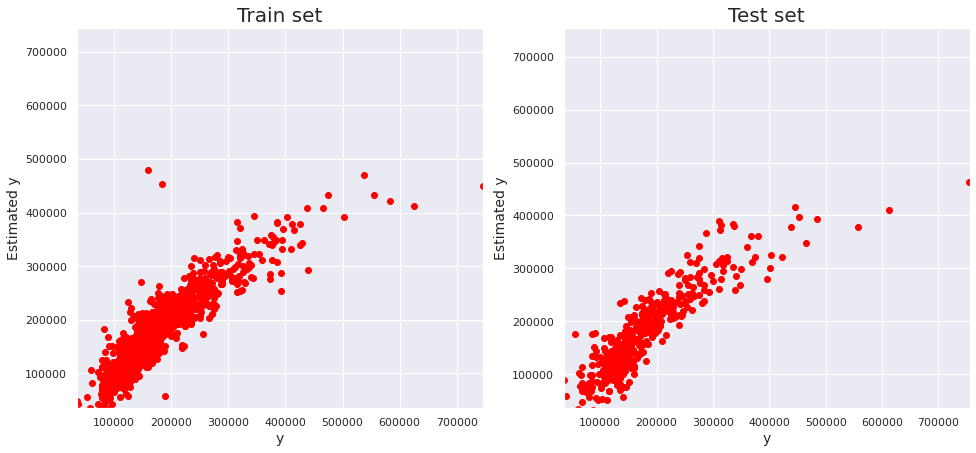

In [62]:
plot_yreal_ypred(y_test, y_train, X_test, X_train, LR)

По графикам видно, что модель не переобучилась и результаты получились хорошими.